In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

from ggplot import *

/home/akash/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:66: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/akash/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/akash/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('Train.csv')
df.head(10)

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,9,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,4,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,0,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,2,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,7,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,8,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,7,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to feature_784
dtypes: float64(784), int64(1)
memory usage: 359.3 MB


In [4]:
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.453933,0.150047,0.273627,0.000363,0.000087,0.017835,0.084351,0.000683,0.303340,0.251321,...,0.006671,0.000038,0.278080,0.393026,0.000027,0.0,0.489655,0.004091,0.441614,0.468356
std,2.889270,0.319200,0.396285,0.014712,0.007645,0.112505,0.242649,0.022328,0.407942,0.387669,...,0.071006,0.003626,0.397938,0.432747,0.003198,0.0,0.435129,0.051939,0.438865,0.435704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.125500,0.000000,0.0,0.502000,0.000000,0.306000,0.427500
75%,7.000000,0.000000,0.608000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733400,0.502000,...,0.000000,0.000000,0.623500,0.945300,0.000000,0.0,0.988300,0.000000,0.988300,0.988300
max,9.000000,1.000000,1.000000,0.996000,0.988300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.588400,1.000000,1.000000,0.525400,0.0,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().values.any()

False

## No **NULL** values. So no need to impute the missing values

In [6]:
for col in df.columns[1:]:
    if max(df[col]) > 1:
        print(max(df[col]))

In [7]:
df['label'].unique()

array([6, 9, 4, 0, 2, 7, 8, 5, 3, 1])

## classification problem of dividing in 10 classes

In [8]:
y = df['label']
X = df.drop('label',axis=1)
X.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.9570,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9920,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,0.0000,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,0.0000,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.1686,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,0.0000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.0000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9960,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,0.4707,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,0.0000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [9]:
for col in df.columns:
    if df[col].dtype == np.int64:
        print(col)
    if df[col].dtype == str:
        print(col)

label


### sklearn imports

In [33]:
import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift

#### TRAIN_TEST_SPLIT

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=int(len(X)/6),random_state=42)

In [12]:
X_test.shape,y_test.shape

((10000, 784), (10000,))

In [13]:
X_train.shape,y_train.shape

((50000, 784), (50000,))

In [14]:
skf = StratifiedKFold(n_splits=10)

In [15]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=int(len(X_train)/5),random_state=21)

In [16]:
X_train.shape,X_val.shape

((40000, 784), (10000, 784))

In [17]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_train)
pca_result

array([[-1.25943337, -0.77864074, -3.47492275,  0.47581368],
       [ 1.52522403,  4.61409076,  0.80949474,  1.77286053],
       [-0.39000172,  1.80724607,  1.22857556, -1.53848304],
       ..., 
       [-0.89546678,  1.39591181,  0.27758518,  0.10187087],
       [-0.14291827, -0.31252155,  0.95032118,  2.07778125],
       [-3.48913551, -1.60455336,  0.27815794, -0.30753871]])

In [18]:
pca.explained_variance_ratio_

array([ 0.0973483 ,  0.07084508,  0.06164688,  0.05399496])

In [19]:
y_train.values

array([3, 4, 5, ..., 7, 2, 1])

In [ ]:
plot_df = pd.DataFrame(dict(x=pca_result[:,0], y=pca_result[:,1], color=y_train.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

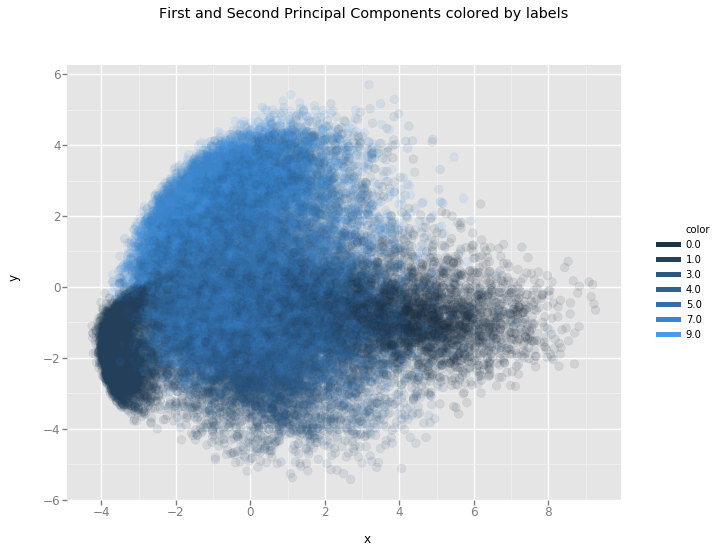

<ggplot: (8748403280946)>

In [21]:
ggplot(plot_df,aes(x='x',y='y',color='color')) + geom_point(size=75,alpha=0.1) + ggtitle("First and Second Principal Components colored by labels")

In [28]:
tsne = TSNE(n_components=2,verbose=1,perplexity=50,n_iter=1000,learning_rate=500)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=500,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=50,
   random_state=None, verbose=1)

In [29]:
tsne_results = tsne.fit_transform(X_train)
tsne_results

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 40000 samples in 8.625s...
[t-SNE] Computed neighbors for 40000 samples in 2915.443s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for

array([[ 40.20495224,  -2.8345623 ],
       [ 48.68717575,  56.76216507],
       [ -8.86336231, -12.96421242],
       ..., 
       [-20.56967926,  48.38512039],
       [-53.47761154, -23.95413971],
       [-45.33810043,  30.20782089]], dtype=float32)

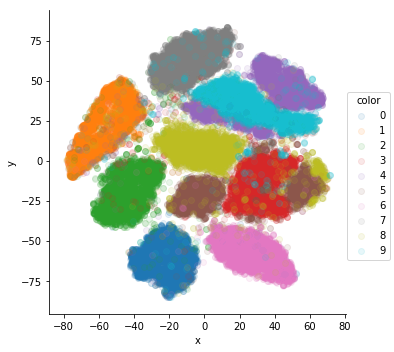

In [30]:
plot_df = pd.DataFrame(dict(x=tsne_results[:,0], y=tsne_results[:,1], color=y_train.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

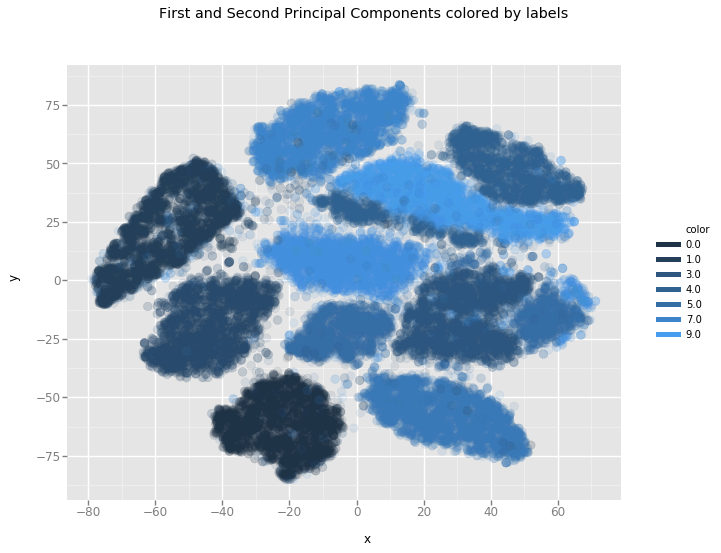

<ggplot: (-9223363288513648331)>

In [31]:
ggplot(plot_df,aes(x='x',y='y',color='color')) + geom_point(size=75,alpha=0.1) + ggtitle("First and Second Principal Components colored by labels")

In [38]:
tsne1 = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300,learning_rate=200)
tsne1

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=300, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [39]:
tsne_results1 = tsne.fit_transform(X_train)
tsne_results1

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 40000 samples in 8.915s...
[t-SNE] Computed neighbors for 40000 samples in 2786.878s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for

array([[-16.67247581,  65.10401154],
       [ 29.08022499, -69.34654236],
       [-15.1333046 ,  12.03668976],
       ..., 
       [ 54.94525528,   5.69978237],
       [-11.75618935, -30.96849823],
       [ 28.62641144,  51.67399979]], dtype=float32)

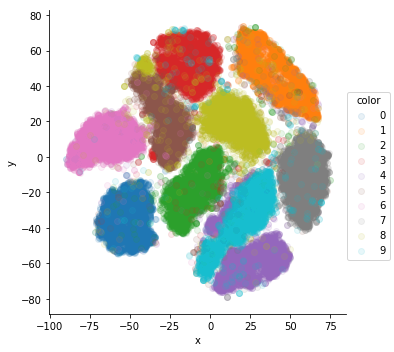

In [40]:
plot_df = pd.DataFrame(dict(x=tsne_results1[:,0], y=tsne_results1[:,1], color=y_train.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

In [41]:
tsne2 = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=200)
tsne2

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [42]:
tsne_results2 = tsne.fit_transform(X_train)
tsne_results2

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 40000 samples in 7.991s...
[t-SNE] Computed neighbors for 40000 samples in 2748.879s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for

array([[ 40.00899887, -13.90130329],
       [ 60.04812241,  43.08640671],
       [ -7.96913147, -12.19118977],
       ..., 
       [ -7.87846994,  51.32539368],
       [-56.10605621,  -3.64825201],
       [-35.62760925,  41.11241531]], dtype=float32)

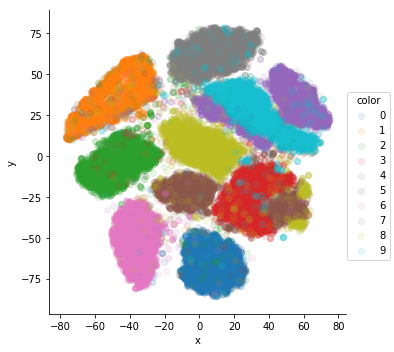

In [43]:
plot_df = pd.DataFrame(dict(x=tsne_results2[:,0], y=tsne_results2[:,1], color=y_train.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

In [44]:
tsne3 = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=500)
tsne3

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=500,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [45]:
tsne_results3 = tsne.fit_transform(X_train)
tsne_results3

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 40000 samples in 8.259s...
[t-SNE] Computed neighbors for 40000 samples in 2750.810s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for

array([[ 56.80965042,   3.84891057],
       [-46.30169678, -21.31018639],
       [ -6.31262875,  18.37075806],
       ..., 
       [  8.46425152, -57.42662811],
       [ 32.9388237 , -51.72373199],
       [-44.80916595,  47.4147644 ]], dtype=float32)

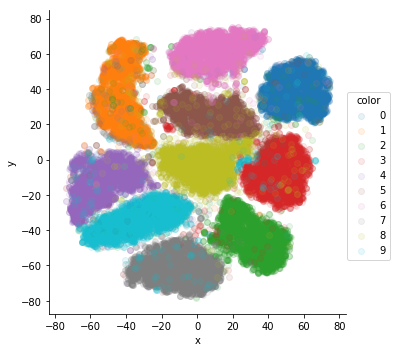

In [46]:
plot_df = pd.DataFrame(dict(x=tsne_results3[:,0], y=tsne_results3[:,1], color=y_train.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

### 50 features represent nearly 82.5% data 

In [49]:
pca_50 = PCA(n_components=50)
pca_50_results = pca_50.fit_transform(X_train)
pca_50_results

array([[-1.25943191, -0.77866782, -3.4749038 , ..., -0.10129222,
         0.18011128,  0.04126205],
       [ 1.52522086,  4.61414326,  0.80940588, ...,  0.58534998,
        -0.09101301,  0.08141813],
       [-0.39000169,  1.80724523,  1.22856039, ..., -0.24041959,
        -0.23985874,  0.58315907],
       ..., 
       [-0.89546548,  1.39589016,  0.27762022, ..., -0.09457557,
        -0.56137035,  0.77543222],
       [-0.1429175 , -0.31253816,  0.95032892, ...,  0.85470316,
         0.81835662, -0.00860031],
       [-3.48913708, -1.6045303 ,  0.27811048, ..., -0.03268904,
         0.16135527,  0.10583399]])

In [50]:
np.sum(pca_50.explained_variance_ratio_)

0.82469196889645247

In [53]:
tsne_pca = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=500)
# tsne3 = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=500)
tsne_pca

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=500,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [55]:
tsne_pca_results = tsne_pca.fit_transform(pca_50_results)
tsne_pca_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.621s...
[t-SNE] Computed neighbors for 40000 samples in 221.767s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for 

array([[-56.70439911, -40.57668686],
       [-12.60696793, -84.30194855],
       [-21.73795891,   9.59811974],
       ..., 
       [ 51.18148804, -20.54811668],
       [ 40.42290115,  37.81491852],
       [ 66.34034729,  -2.50034666]], dtype=float32)

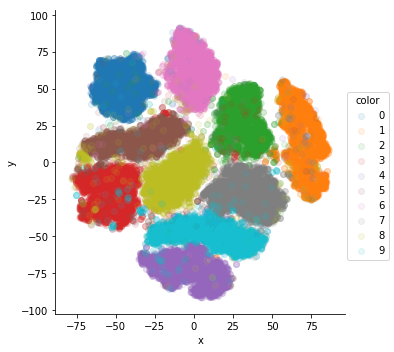

In [58]:
plot_50_df = pd.DataFrame(dict(x=tsne_pca_results[:,0], y=tsne_pca_results[:,1], color=y_train.values))

sns.lmplot('x', 'y', data=plot_50_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

In [63]:
ms = MeanShift(n_jobs=-1)

In [64]:
ms.fit(plot_50_df[['x','y']])

KeyboardInterrupt: 

### Transfor X_val,X_test and transform all into numpy array

In [67]:
X_train_np = tsne_pca_results
X_train_np

array([[-56.70439911, -40.57668686],
       [-12.60696793, -84.30194855],
       [-21.73795891,   9.59811974],
       ..., 
       [ 51.18148804, -20.54811668],
       [ 40.42290115,  37.81491852],
       [ 66.34034729,  -2.50034666]], dtype=float32)

In [70]:
X_val_np = tsne_pca.fit_transform(pca_50.transform(X_val))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.073s...
[t-SNE] Computed neighbors for 10000 samples in 21.456s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.855465
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.633728
[t-SNE] Error after 1000 iterations: 1.698668


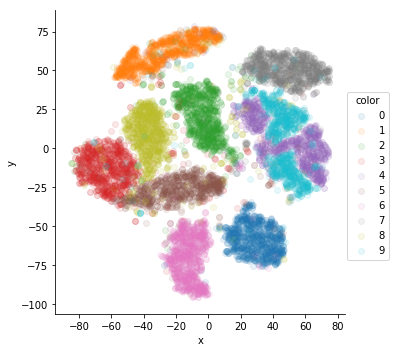

In [72]:
plot_50_val_df = pd.DataFrame(dict(x=X_val_np[:,0], y=X_val_np[:,1], color=y_val.values))

sns.lmplot('x', 'y', data=plot_50_val_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

In [73]:
tsne_pca

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=500,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [74]:
X_test_np = tsne_pca.fit_transform(pca_50.transform(X_test))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.026s...
[t-SNE] Computed neighbors for 10000 samples in 14.429s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.845074
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.557495
[t-SNE] Error after 1000 iterations: 1.692166


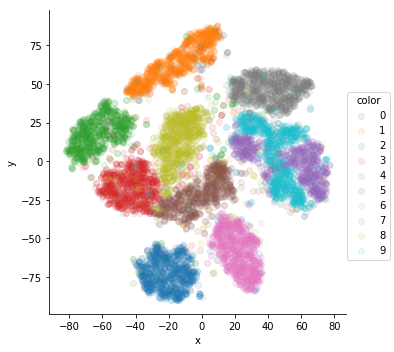

In [76]:
plot_50_test_df = pd.DataFrame(dict(x=X_test_np[:,0], y=X_test_np[:,1], color=y_test.values))

sns.lmplot('x', 'y', data=plot_50_test_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

In [77]:
X_test_np

array([[-57.37891769,  37.56369781],
       [-55.23423004, -14.32963085],
       [-29.46495819, -28.24482727],
       ..., 
       [  6.72867966,  75.43643188],
       [-47.18442535, -24.90347481],
       [-12.92503548, -88.36067963]], dtype=float32)

In [78]:
X_val_np

array([[ -0.97005337,  66.7162323 ],
       [ 26.68309402, -64.77481842],
       [-55.25086975,  -1.29028189],
       ..., 
       [-15.3293705 , -84.86907196],
       [ 52.23845673,  12.2164402 ],
       [ 28.69516754,   0.65200347]], dtype=float32)

## Consider two models DT and NN

### NN

In [106]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Add,Dropout
from keras import optimizers,losses
from keras.callbacks import History,ModelCheckpoint
from keras.utils.np_utils import to_categorical

In [85]:
X_train_np.shape

(40000, 2)

In [88]:
model = Sequential()
model.add(Dense(units=256,input_shape=(2,),activation='relu',use_bias=True))
model.add(Dropout(0.1))
model.add(Dense(units=256,activation='relu',use_bias=True))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation='softmax',use_bias=True))

In [89]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               768       
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 69,130
Trainable params: 69,130
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer = optimizers.SGD(lr=0.01,momentum=0.9),loss = losses.categorical_crossentropy,metrics=['accuracy'])

In [92]:
checkpoint = ModelCheckpoint('./model.h5',
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

In [110]:
def my_generator(x_data,y_data,batch_size):
    L = len(x_data)
    while True:              # this line is to
        batch_start = 0
        batch_end = batch_size
        
        while batch_start < L:
            end = min(batch_end,L)
            x_batch = x_data[batch_start:end]
            y_batch = y_data[batch_start:end]
            yield (x_batch,y_batch)
            batch_start += batch_size
            batch_end += batch_size

In [105]:
y_train.values

array([3, 4, 5, ..., 7, 2, 1])

In [107]:
to_categorical(y_train.values)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [109]:
len(X_train_np)

40000

In [111]:
fit = model.fit_generator(my_generator(X_train_np,to_categorical(y_train.values),32),
                          steps_per_epoch=len(X_train_np)/32,
                          epochs=50,
                          callbacks=[checkpoint],
                          validation_data=my_generator(X_val_np,to_categorical(y_val.values),16),
                          validation_steps=len(X_val_np)/16)

Epoch 1/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0974 - acc: 0.7227 - val_loss: 7.1953 - val_acc: 0.1093
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6071 - acc: 0.8119 - val_loss: 7.6140 - val_acc: 0.1137
Epoch 3/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5882 - acc: 0.8249 - val_loss: 7.0729 - val_acc: 0.0925
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5883 - acc: 0.8273 - val_loss: 8.8146 - val_acc: 0.0986
Epoch 5/50
  10/1250 [..............................] - ETA: 7s - loss: 0.5285 - acc: 0.8844

KeyboardInterrupt: 